In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import units_convertion as uconv
import propagation as prop
import reflection as ref

# Task 1  

Дано:  
Передатчик помех находится на расстоянии R от здания, в котором находится рецептор помех. Рельеф местности задается произвольно. Высота подъема антенны передатчика помех 𝐻_1, высота рецептора помех 𝐻_2  . Мощность первой гармоники на выходе передатчика 𝑃_пер. Коэффициент усиления передающей антенны 𝐺_пер. Рабочая частота 𝑓. Толщина бетонной стены 𝑑. Для бетона (𝜇_отн=1, 𝜀_отн=4.5).

Найти:  
Мощность помехи на входе рецептора помех в здании.

In [2]:
# option 7

# tx cfg
P_tx_wt = 1.5
P_tx_db = uconv.P2db(P_tx_wt)
G_tx_db = 45
f = 8.2e9
w = 2*np.pi*f
lamb = uconv.f2lamb(f)

# wall cfg
d_wall = 0.7
mu_wall = 1
eps_wall = 4.5

# landscape cfg
R = 0.6e3
H_tx = 10
H_rx = 36
ht = np.array([10, 5, 1, 2, 10, 12, 10, 7, 5, 6, 8])
Rt = np.linspace(0, R, ht.size)

# environment cfg
PHI = 0.3
refraction = -8e-8
p_h20 = 7.5
temperature = 20

# explore track profile

Earth radius equivalent calculation:
	Re_eq=8549.841644747436 km


<IPython.core.display.Javascript object>


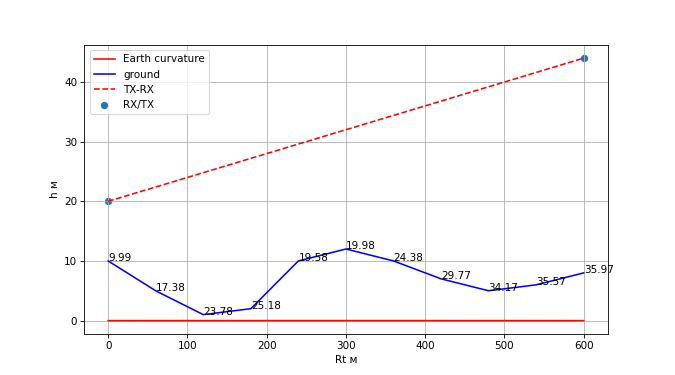

min_clr=19.58
Rt_min_clr=240.00


In [3]:
%matplotlib notebook
y, y_tx, y_rx, h_clr = prop.track_clearance(Rt, ht, H_tx, H_rx, refraction, print_en=True)
prop.plot_clearance(Rt, y, y_tx, y_rx, h_clr, refraction)

l_brd = 2
r_brd = -2
h_clr_min = np.min(h_clr[l_brd:r_brd])
R_clr_min = Rt[l_brd:r_brd][np.argmin(h_clr[l_brd:r_brd])]
print('min_clr={:.2f}'.format(h_clr_min))
print('Rt_min_clr={:.2f}'.format(R_clr_min))

In [5]:
W0_db = prop.free_space_loss_db(lamb, R)
print("W0 = {} db".format(W0_db))
print()
V_interf_db = prop.V_interf_attenuation_db(PHI, refraction, f, Rt[-1], R_clr_min, h_clr_min, print_en=True)
print()
V_atmospher_db = prop.atmospher_attenuation_db_per_km(f, p_h20, 20, print_en=True) * (Rt[-1] - Rt[0])*1e-3
print("V_atmospher_db = {} dB".format(V_atmospher_db))
print()

P_wall_db = P_tx_db + W0_db + G_tx_db - V_interf_db - V_atmospher_db
print("P_wall = {} db".format(P_wall_db))

W0 = -105.79954721039368 db

V_interf_attenuation calculation:
	dH = 0.0017280000000000002 m
	H0 = 1.3624246594942506 m
	p(ref) = 14.372184154675299
	V_interf = 1.2756711540066972 dB

atmospher attenuation calculation:
	f=8.200 GHz, t=20, p_h20=7.5
	g_ox = 0.006688690082812421 dB/km
	g_h20 = 0.0042254273213449805 dB/km
	g = 0.009312054703613286 dB/km
V_atmospher_db = 0.005587232822167971 dB

P_wall = -60.31989300666573 db


In [6]:
P_wall_db = P_tx_db + G_tx_db + W0_db - V_interf_db - V_atmospher_db
print("P_wall = {} dB".format(P_wall_db))

P_wall = -60.31989300666573 dB


In [7]:
wall_mat = ref.HE_mat(w, d_wall, mu=mu_wall, eps=eps_wall)
wall_rh, wall_th = ref.HE_mat_RhTh(wall_mat)
wall_tp = ref.Th2Tp(wall_th, 0)
wall_tp_db = uconv.P2db(wall_tp)
print("wall_th = {}".format(wall_th))
print("wall_tp = {} dB".format(wall_tp_db))

wall_th = (-0.6501465700372411+0.6200231610015874j)
wall_tp = -0.9306227693297833 dB


In [8]:
P_inside_db = P_wall_db + wall_tp_db
print("P_inside = {} dB = {} Wt".format(P_inside_db, uconv.db2P(P_inside_db)))

P_inside = -61.25051577599551 dB = 7.498051558256353e-07 Wt


# Task 2

In [9]:
P_tx_db = uconv.P2db(1.5)
G_tx_db = 45
G_rx_db = 35
nu_db = -3.6

f = 8.2e9
w = 2*np.pi*f
lamb = uconv.f2lamb(f)

R0 = 12e3

In [10]:
print(H_tx)
print(H_rx)
print((H_tx+H_rx)/2)

10
36
23.0


In [12]:

ht_1 = np.array([])

tracks = [
    (
        np.array([0,    R0/2,              R0]),
        np.array([H_tx, (H_tx+H_rx)/2 - 2, H_rx])
    ),
    (
        np.array([0,    R0*0.3,            0.6*R0,            R0]),
        np.array([H_tx, H_tx*0.7+H_rx*0.3, H_tx*0.4+H_rx*0.6, H_rx])
    ),
    (
        np.array([0,    R0*0.4, 0.8*R0, R0]),
        np.array([H_tx, 27,     36,     H_rx])
    ),
]

tracks_attenuation = np.zeros(3)

for i in range(len(tracks)):
    print()
    print()
    print("track {}:".format(i))
    
    R = tracks[i][0]
    h = tracks[i][1]
    
    print("track R = {}".format(R))
    print("track h = {}".format(h))
    tracks_attenuation[i] = prop.obstacles_attenuation_db(R, h, lamb, print_en=True)



track 0:
track R = [    0.  6000. 12000.]
track h = [10. 21. 36.]
calculating attenuation on obstacles:
	 1th obstacle:
		H = 2.0
		R1 = 6000.0
		R2 = 6000.0
		normalized clearance = 0.051639777949432225
		attenuation = [-5.57223654] dB

total attenuation = [-5.57223654] dB


track 1:
track R = [    0.  3600.  7200. 12000.]
track h = [10.  17.8 25.6 36. ]
calculating attenuation on obstacles:
	 1th obstacle:
		H = 0.0
		R1 = 3600.0
		R2 = 3600.0
		normalized clearance = 0.0
		attenuation = [-6.02059991] dB

	 2th obstacle:
		H = 0.0
		R1 = 3600.0
		R2 = 4800.0
		normalized clearance = 0.0
		attenuation = [-6.02059991] dB

total attenuation = [-12.04119983] dB


track 2:
track R = [    0.  4800.  9600. 12000.]
track h = [10 27 36 36]
calculating attenuation on obstacles:
	 1th obstacle:
		H = -4.0
		R1 = 4800.0
		R2 = 4800.0
		normalized clearance = -0.11547005383792516
		attenuation = [-7.0217198] dB

	 2th obstacle:
		H = -3.0
		R1 = 4800.0
		R2 = 2400.0
		normalized clearance = -0.

In [14]:
track = tracks[1]
R0 = track[0][3] - track[0][0]
R1 = track[0][1] - track[0][0]
R2 = track[0][2] - track[0][1]
R3 = track[0][3] - track[0][2]

print("R0 = {}".format(R0))
print("R1 = {}".format(R1))
print("R2 = {}".format(R2))
print("R3 = {}".format(R3))

V_obs_H0_db = prop.obstacles_H0_attenuation_db(R0, R1, R2, R3)
tracks_attenuation[1] = V_obs_H0_db
print("V_obs_H0_db = {} dB".format(V_obs_H0_db))
print("V_obs_H0 = {} ".format(uconv.db2P(V_obs_H0_db)))

W0_db = prop.free_space_loss_db(lamb, R0)
print("W0 = {} dB".format(W0_db))

R0 = 12000.0
R1 = 3600.0
R2 = 3600.0
R3 = 4800.0
V_obs_H0_db = -4.688350904586105 dB
V_obs_H0 = 0.33975425899284395 
W0 = -131.8201471236733 dB


In [15]:
P_rx_db = P_tx_db + G_tx_db + G_rx_db + 2*nu_db + W0_db + tracks_attenuation
P_rx_db

array([-62.83147107, -61.94758544, -71.22140109])